# Task 5 – Personal Loan Acceptance Prediction

## 📌 Objective:
Predict which customers are likely to accept a personal loan offer based on their profile.

This can help banks optimize their marketing campaigns and target the right customer segments.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# 1. Load Dataset
df = pd.read_csv("bank.csv", sep=',')  
df.columns = df.columns.str.strip()    

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 📁 Dataset Description

- Dataset: Bank Marketing Dataset (UCI Machine Learning Repository)
- Target: `deposit` (1 = accepted the offer, 0 = did not accept)
- Features: age, job, marital status, education, balance, housing, etc.
- Many categorical features are encoded using Label Encoding and One-Hot Encoding.


In [4]:
# 2. Basic Exploration
print("✅ Columns loaded:", df.columns.tolist())
print(df[['age', 'job', 'marital', 'loan']].head())
print("Target distribution:\n", df['deposit'].value_counts())

✅ Columns loaded: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']
   age         job  marital loan
0   59      admin.  married   no
1   56      admin.  married   no
2   41  technician  married   no
3   55    services  married   no
4   54      admin.  married   no
Target distribution:
 deposit
no     5873
yes    5289
Name: count, dtype: int64


In [5]:
# 3. Encode Categorical Features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## 📊 Exploratory Data Analysis (EDA)

We visualize key features like age, balance, and job type to explore patterns that may affect personal loan acceptance.


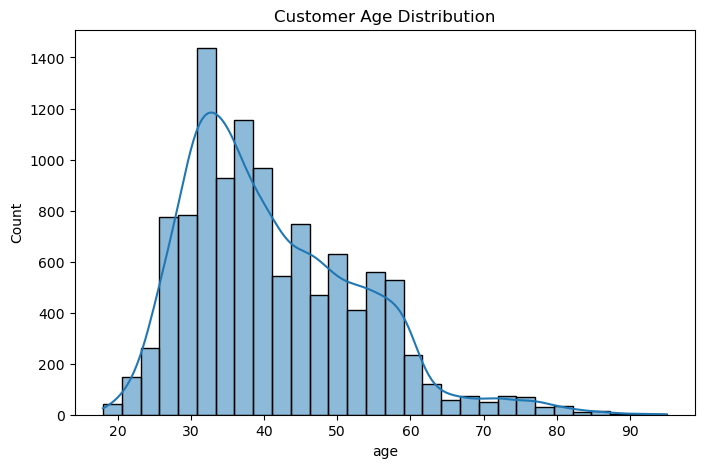

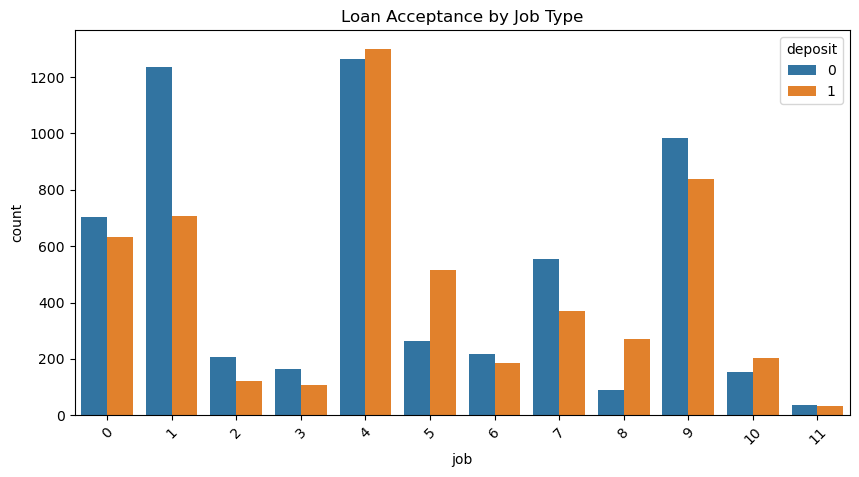

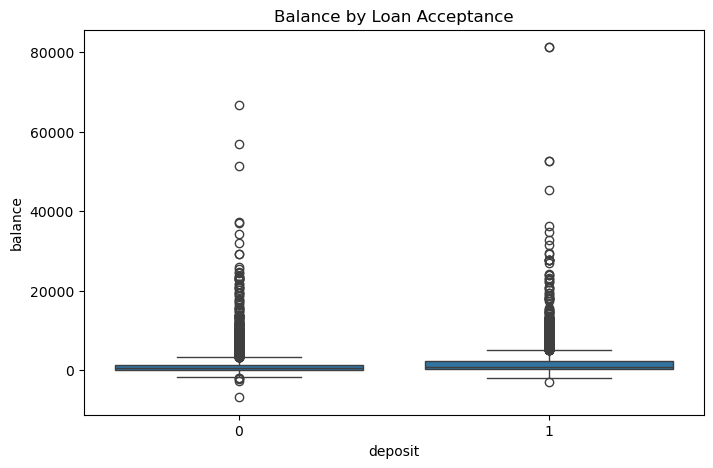

In [6]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.show()

# 2. Loan Acceptance by Job
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', hue='deposit')
plt.title("Loan Acceptance by Job Type")
plt.xticks(rotation=45)
plt.show()

# 3. Balance by Loan Acceptance
plt.figure(figsize=(8, 5))
sns.boxplot(x='deposit', y='balance', data=df)
plt.title("Balance by Loan Acceptance")
plt.show()


In [7]:
# 4. Features & Target
X = df.drop('deposit', axis=1)
y = df['deposit']

In [8]:
# 5. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# 7. Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# 8. Evaluate Model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc, 4))
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



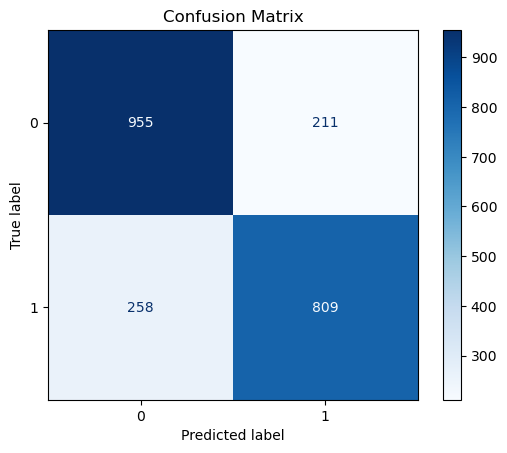

In [12]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

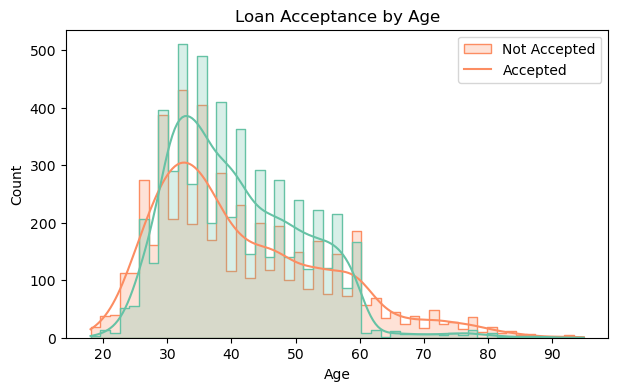

In [13]:
# 🔟 Visualization: Age vs Loan Acceptance
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='age', hue='deposit', kde=True, element='step', palette='Set2')
plt.title('Loan Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Accepted', 'Accepted'])
plt.show()

## 📌 Conclusion

- A logistic regression model was trained to predict personal loan acceptance using customer features.
- Key categorical variables like job, marital status, and education were encoded appropriately.
- Exploratory analysis showed patterns in age, balance, and job type affecting loan decisions.
- Feature scaling helped improve model convergence and stability.
- The model achieved an accuracy of approximately **79%**.
- Insights suggest that age, job type, and account balance strongly influence the likelihood of accepting a loan offer.
